In [2]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize #special package in pandas
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#send request to data API
url = "https://data.princegeorgescountymd.gov/resource/umjn-t2iz.json?$query=SELECT%0A%20%20%60establishment_id%60%2C%0A%20%20%60name%60%2C%0A%20%20%60category%60%2C%0A%20%20%60inspection_date%60%2C%0A%20%20%60inspection_results%60%2C%0A%20%20%60city%60%2C%0A%20%20%60state%60%2C%0A%20%20%60zip%60%2C%0A%20%20%60address_line_1%60%2C%0A%20%20%60address_line_2%60%2C%0A%20%20%60food_from_approved_source%60%2C%0A%20%20%60food_protected_from%60%2C%0A%20%20%60ill_workers_restricted%60%2C%0A%20%20%60proper_hand_washing%60%2C%0A%20%20%60cooling_time_and_temperature%60%2C%0A%20%20%60cold_holding_temperature%60%2C%0A%20%20%60hot_holding_temperature%60%2C%0A%20%20%60cooking_time_and_temperature%60%2C%0A%20%20%60reheating_time_and_temperature%60%2C%0A%20%20%60hot_and_cold_running_water%60%2C%0A%20%20%60proper_sewage_disposal%60%2C%0A%20%20%60no_bare_hand_contact%60%2C%0A%20%20%60adequate_hand_washing%60%2C%0A%20%20%60rodent_and_insects%60%2C%0A%20%20%60food_contact_surfaces_and%60%2C%0A%20%20%60inspection_type%60%2C%0A%20%20%60owner%60%2C%0A%20%20%60type%60%2C%0A%20%20%60geocoded_column_1%60%2C%0A%20%20%60%3A%40computed_region_87xh_ddyp%60"
food_inspection = requests.get(url)



In [4]:
#Turn the url variable into text and then load into a JSON file
foodinsp_json = json.loads(food_inspection.text)


In [5]:
#Turn JSON file into dataframe
foodinsp_df = pd.json_normalize(foodinsp_json)
# print dataframe
foodinsp_df.head()

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13T00:00:00.000,------,BOWIE,MD,20716,4100 TOWN CENTER BLVD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,N/A,Colleen Lyons,Food Establishments,16438,Point,"[-76.733979, 38.945787]"
1,16073,Anarkali Bazar,Grocery Store,2020-03-24T00:00:00.000,Non-Compliant - Violations Observed,GREENBELT,MD,20770,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,16242,Point,"[-76.908332, 38.997396]"
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11T00:00:00.000,------,BRENTWOOD,MD,20722,4309 BLADENSBURG RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,17161,Point,"[-76.944736, 38.937661]"
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,2020-05-09T00:00:00.000,------,SUITLAND,MD,20746,4809 ALLENTOWN RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,N/A,CYNTHIA WALLACE,Food Establishments,15577,Point,"[-76.889999, 38.818813]"
4,16073,Anarkali Bazar,Grocery Store,2020-03-31T00:00:00.000,Compliance Schedule - Completed,GREENBELT,MD,20770,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,YASIR RANA,Food Establishments,16242,Point,"[-76.908332, 38.997396]"


In [6]:
#College park restaurants 
cp_df = foodinsp_df.loc[foodinsp_df['city']=='COLLEGE PARK']
cp_df

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
14,1146,PIZZA HUT 23538,Fast Food - Chain,2020-05-29T00:00:00.000,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,9015 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Change Of Ownership,LUIS IBARGUENGOYTIA,Food Establishments,15305,Point,"[-76.931327, 38.999878]"
71,2196,SEVEN ELEVEN 11664C,Convenience Store,2020-07-09T00:00:00.000,Compliance Schedule - Outstanding,COLLEGE PARK,MD,20740,4404 KNOX RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,RUCHEE JUDGE,Food Establishments,15305,Point,"[-76.938659, 38.980959]"
76,342,COLLEGE PARK DINER,Restaurant,2020-07-17T00:00:00.000,------,COLLEGE PARK,MD,20740,9206 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,N/A,Adel RIAD,Food Establishments,15305,Point,"[-76.929936, 39.006215]"
101,2228,SEVEN ELEVEN 11642B,Convenience Store,2020-03-16T00:00:00.000,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,4921 EDGEWOOD RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,EABA YADOTA,Food Establishments,15305,Point,"[-76.922405, 39.015982]"
108,730,JASON'S DELI,Fast Food - Chain,2020-03-13T00:00:00.000,Compliance Schedule - Outstanding,COLLEGE PARK,MD,20740,7356 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,JOE TORTORICE JR,Food Establishments,15305,Point,"[-76.937981, 38.980544]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2280,STARBUCKS COFFEE 7517,Coffee Shop,2019-11-13T00:00:00.000,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,4750 CHERRY HILL RD,------,...,In Compliance,In Compliance,Out of Compliance,In Compliance,Comprehensive,MARY HER,Food Establishments,15305,Point,"[-76.929006, 39.015118]"
960,7256,UMCP - ESJ SHOP,College/University,2019-11-08T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,4131 CAMPUS DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,JOSEPH MULLINEAUX,Food Establishments,15306,Point,"[-76.946994, 38.985823]"
961,2078,SOPHIA MARKET,Grocery Store,2019-11-13T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,5000 EDGEWOOD RD,------,...,In Compliance,In Compliance,In Compliance,Out of Compliance,Comprehensive,GLENDA SANCHEZ,Food Establishments,15305,Point,"[-76.920547, 39.016083]"
989,13196,UMCP - ESJ CAFE SUPPORT KITCHEN,College/University,2019-11-08T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,4131 CAMPUS DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,JOSEPH MULLINEAUX,Food Establishments,15306,Point,"[-76.946994, 38.985823]"


<AxesSubplot:>

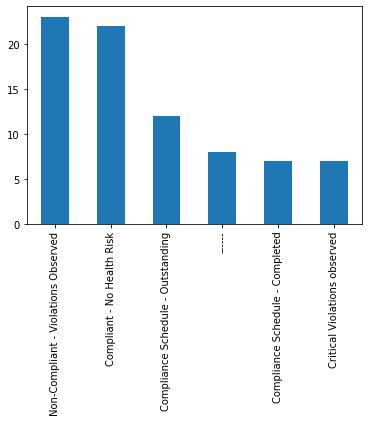

In [7]:
#Bar graph of inspection results in college park
cp_df["inspection_results"].value_counts().plot(kind="bar")

In [8]:
cp_df["inspection_results"].value_counts()

Non-Compliant - Violations Observed    23
Compliant - No Health Risk             22
Compliance Schedule - Outstanding      12
------                                  8
Compliance Schedule - Completed         7
Critical Violations observed            7
Name: inspection_results, dtype: int64

In [9]:
#Restaurants with non-compliant observations present 
non_compliant = foodinsp_df.loc[foodinsp_df['inspection_results']=='Non-Compliant - Violations Observed']
non_compliant

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
1,16073,Anarkali Bazar,Grocery Store,2020-03-24T00:00:00.000,Non-Compliant - Violations Observed,GREENBELT,MD,20770,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,16242,Point,"[-76.908332, 38.997396]"
14,1146,PIZZA HUT 23538,Fast Food - Chain,2020-05-29T00:00:00.000,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,9015 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Change Of Ownership,LUIS IBARGUENGOYTIA,Food Establishments,15305,Point,"[-76.931327, 38.999878]"
15,1517,TAQUERIA LA PLACITA,Fast Food - Local,2020-05-20T00:00:00.000,Non-Compliant - Violations Observed,HYATTSVILLE,MD,20781,5020 EDMONSTON RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,ALEJO MARTINEZ,Food Establishments,8347,Point,"[-76.925527, 38.950414]"
16,16166,HORACE & DICKIES OF GLENARDEN,N/A,2020-11-23T00:00:00.000,Non-Compliant - Violations Observed,GLENARDEN,MD,20706,7905 MARTIN LUTHER KING JR HWY,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,ROYETTE SMITH,Food Establishments,15994,Point,"[-76.870085, 38.930472]"
18,943,MARGARITA'S GROCERY,Convenience Store,2020-11-23T00:00:00.000,Non-Compliant - Violations Observed,TEMPLE HILLS,MD,20748,4313 ST BARNABAS RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,NEPOMUCENO ALVAREZ-MATUL,Food Establishments,15817,Point,"[-76.941323, 38.830748]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,8212,KENNYS SUB SHOP,Carry-out,2019-11-12T00:00:00.000,Non-Compliant - Violations Observed,BELTSVILLE,MD,20705,10610 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,Out of Compliance,Comprehensive,QIN LAN,Food Establishments,15750,Point,"[-76.915605, 39.029175]"
985,1687,24/7 CONVENIENCE STORE,Convenience Store,2019-11-12T00:00:00.000,Non-Compliant - Violations Observed,LAUREL,MD,20707,7707 OLD SANDY SPRING RD,------,...,In Compliance,In Compliance,Out of Compliance,In Compliance,Comprehensive,DILIP PATEL,Food Establishments,15996,Point,"[-76.872061, 39.104004]"
987,1306,SAM'S DONUT & COFFEE,Carry-out,2019-11-08T00:00:00.000,Non-Compliant - Violations Observed,HYATTSVILLE,MD,20783,7992 NEW HAMPSHIRE AVE,------,...,In Compliance,In Compliance,Out of Compliance,In Compliance,Comprehensive,HAN PHAN,Food Establishments,10889,Point,"[-76.98752, 38.990868]"
995,241,CARIBBEAN SEA,Restaurant,2019-11-13T00:00:00.000,Non-Compliant - Violations Observed,TAKOMA PARK,MD,20912,6869 NEW HAMPSHIRE AVE,------,...,In Compliance,In Compliance,Out of Compliance,In Compliance,Comprehensive,YVONNE EDWARDS,Food Establishments,2327,Point,"[-76.995725, 38.973829]"


In [10]:
#Non-compliant college park restaurants 
non_compliant_cp = non_compliant.loc[non_compliant['city']=='COLLEGE PARK']

Text(0, 0.5, 'Frequency')

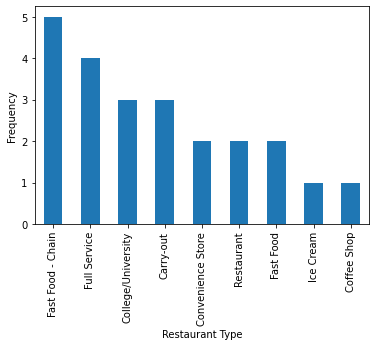

In [11]:
#Bar graph of non compliant restaurant types
non_compliant_cp["category"].value_counts().plot(kind="bar")
plt.xlabel("Restaurant Type")
plt.ylabel("Frequency")

In [12]:
#All critical violation data
critical_viol = foodinsp_df.loc[foodinsp_df['inspection_results']=='Critical Violations observed']
critical_viol

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
7,1085,PANDA CAFE,Carry-out,2020-01-27T00:00:00.000,Critical Violations observed,OXON HILL,MD,20745,5119 INDIAN HEAD HWY,B,...,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,ZHAO SHU ZHENG,Food Establishments,15574,Point,"[-77.000162, 38.819457]"
33,374,CROWN FRIED CHICKEN AND KABOB HOUSE,Fast Food - Local,2020-09-24T00:00:00.000,Critical Violations observed,FORT WASHINGTON,MD,20744,11911 LIVINGSTON RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Change Of Ownership,RAHMATULLA Ayuby,Food Establishments,15572,Point,"[-76.990525, 38.726479]"
36,233,CAMERON'S SEAFOOD RESTAURANT,Seafood,2020-05-28T00:00:00.000,Critical Violations observed,CAPITOL HEIGHTS,MD,20743,8807 CENTRAL AVE,A,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,BJJAN MANESH,Food Establishments,15568,Point,"[-76.852767, 38.890613]"
46,233,CAMERON'S SEAFOOD RESTAURANT,Seafood,2020-06-04T00:00:00.000,Critical Violations observed,CAPITOL HEIGHTS,MD,20743,8807 CENTRAL AVE,A,...,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,BJJAN MANESH,Food Establishments,15568,Point,"[-76.852767, 38.890613]"
61,2117,PAPA JOHN'S PIZZA,Fast Food - Chain,2021-01-27T00:00:00.000,Critical Violations observed,OXON HILL,MD,20745,5310 INDIAN HEAD HWY,------,...,In Compliance,In Compliance,In Compliance,In Compliance,N/A,SUNIL SINGH,Food Establishments,15574,Point,"[-76.998898, 38.817015]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,283,CHEVY'S FRESH MEX AT BRANDYWINE,Restaurant,2019-11-13T00:00:00.000,Critical Violations observed,BRANDYWINE,MD,20613,15914 CRAIN HWY,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,THOMAS OLEARY,Food Establishments,9221,Point,"[-76.875934, 38.673109]"
980,2016,MCDONALDS 5579,Fast Food,2019-11-12T00:00:00.000,Critical Violations observed,HYATTSVILLE,MD,20783,7911 NEW HAMPSHIRE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,DON THOMPSON,Food Establishments,10889,Point,"[-76.987568, 38.9894]"
993,1404,SMOKE SHACK RIBS & BBQ,Carry-out,2019-11-08T00:00:00.000,Critical Violations observed,FORT WASHINGTON,MD,20744,9119 LIVINGSTON RD,------,...,In Compliance,In Compliance,Out of Compliance,In Compliance,Comprehensive,CHRISTOPHER FOUNTAIN,Food Establishments,15572,Point,"[-76.995239, 38.763994]"
997,1096,PANERA BREAD,Fast Food,2019-11-08T00:00:00.000,Critical Violations observed,BOWIE,MD,20720,10531 MARTIN LUTHER KING JR HWY,------,...,In Compliance,In Compliance,Out of Compliance,Out of Compliance,Monitoring,BRIAN LEMEK,Food Establishments,16440,Point,"[-76.825326, 38.955853]"


In [13]:
#all critical violation College Park data
critical_viol_cp = critical_viol.loc[critical_viol['city']=='COLLEGE PARK']
critical_viol_cp

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
255,1015,NELLY'S CAFE,Full Service,2019-10-23T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,9917 RHODE ISLAND AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,Miguel Medrano,Food Establishments,15305,Point,"[-76.920518, 39.01661]"
575,13334,THE HOTEL @ UMCP - LOBBY BAR,Full Service,2018-05-22T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,SUSAN HILLMAN,Food Establishments,15306,Point,"[-76.936569, 38.986309]"
576,13326,THE HOTEL @ UMCP - BAGELS 'N GRINDS,Full Service,2018-06-28T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,A,...,In Compliance,In Compliance,Out of Compliance,In Compliance,Monitoring,ADAM GREENBERG,Food Establishments,15306,Point,"[-76.936569, 38.986309]"
594,84,BAGEL PLACE OF COLLEGE PARK,Fast Food - Local,2020-07-15T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,7423 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,DEBORA KARANOVICH,Food Establishments,15305,Point,"[-76.937838, 38.981915]"
709,1532,TEN REN'S TEA TIME,Full Service,2019-11-07T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,7418 BALTIMORE AVE,------,...,In Compliance,In Compliance,Out of Compliance,Out of Compliance,Comprehensive,YAO-TSUNG LIU,Food Establishments,15305,Point,"[-76.937978, 38.981327]"
920,1683,YUM'S EXPRESS,Carry-out,2019-11-12T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,4746 CHERRY HILL RD,------,...,In Compliance,In Compliance,Out of Compliance,Out of Compliance,Comprehensive,CHENG ZHENG,Food Establishments,15305,Point,"[-76.928742, 39.014955]"
961,2078,SOPHIA MARKET,Grocery Store,2019-11-13T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,5000 EDGEWOOD RD,------,...,In Compliance,In Compliance,In Compliance,Out of Compliance,Comprehensive,GLENDA SANCHEZ,Food Establishments,15305,Point,"[-76.920547, 39.016083]"


In [14]:
all_non_comp = [critical_viol_cp, non_compliant_cp]

all_non_comp_df = pd.concat(all_non_comp)
all_non_comp_df

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
255,1015,NELLY'S CAFE,Full Service,2019-10-23T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,9917 RHODE ISLAND AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,Miguel Medrano,Food Establishments,15305,Point,"[-76.920518, 39.01661]"
575,13334,THE HOTEL @ UMCP - LOBBY BAR,Full Service,2018-05-22T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,SUSAN HILLMAN,Food Establishments,15306,Point,"[-76.936569, 38.986309]"
576,13326,THE HOTEL @ UMCP - BAGELS 'N GRINDS,Full Service,2018-06-28T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,A,...,In Compliance,In Compliance,Out of Compliance,In Compliance,Monitoring,ADAM GREENBERG,Food Establishments,15306,Point,"[-76.936569, 38.986309]"
594,84,BAGEL PLACE OF COLLEGE PARK,Fast Food - Local,2020-07-15T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,7423 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,DEBORA KARANOVICH,Food Establishments,15305,Point,"[-76.937838, 38.981915]"
709,1532,TEN REN'S TEA TIME,Full Service,2019-11-07T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,7418 BALTIMORE AVE,------,...,In Compliance,In Compliance,Out of Compliance,Out of Compliance,Comprehensive,YAO-TSUNG LIU,Food Establishments,15305,Point,"[-76.937978, 38.981327]"
920,1683,YUM'S EXPRESS,Carry-out,2019-11-12T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,4746 CHERRY HILL RD,------,...,In Compliance,In Compliance,Out of Compliance,Out of Compliance,Comprehensive,CHENG ZHENG,Food Establishments,15305,Point,"[-76.928742, 39.014955]"
961,2078,SOPHIA MARKET,Grocery Store,2019-11-13T00:00:00.000,Critical Violations observed,COLLEGE PARK,MD,20740,5000 EDGEWOOD RD,------,...,In Compliance,In Compliance,In Compliance,Out of Compliance,Comprehensive,GLENDA SANCHEZ,Food Establishments,15305,Point,"[-76.920547, 39.016083]"
14,1146,PIZZA HUT 23538,Fast Food - Chain,2020-05-29T00:00:00.000,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,9015 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Change Of Ownership,LUIS IBARGUENGOYTIA,Food Establishments,15305,Point,"[-76.931327, 38.999878]"
101,2228,SEVEN ELEVEN 11642B,Convenience Store,2020-03-16T00:00:00.000,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,4921 EDGEWOOD RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,EABA YADOTA,Food Establishments,15305,Point,"[-76.922405, 39.015982]"
139,6345,Frutta Bowls,Restaurant,2019-10-18T00:00:00.000,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,8150 BALTIMORE AVE,B,...,In Compliance,In Compliance,Out of Compliance,In Compliance,Comprehensive,ROBERT CALAVETTA,Food Establishments,15305,Point,"[-76.933738, 38.991271]"


In [15]:
all_non_comp_df["inspection_results"].value_counts()

Non-Compliant - Violations Observed    23
Critical Violations observed            7
Name: inspection_results, dtype: int64

In [16]:
#all compliant data 
compliant_df = foodinsp_df.loc[foodinsp_df['inspection_results']=='Compliant - No Health Risk']
compliant_df

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
8,49,APPLEBEE'S,Restaurant,2020-05-20T00:00:00.000,Compliant - No Health Risk,SPRINGDALE,MD,20774,1000 LARGO CENTER DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,TERRI M CARMAN,Food Establishments,8340,Point,"[-76.837558, 38.902716]"
17,6276,QUICKWAY JAPANESE HIBACHI,Fast Food - Chain,2020-11-23T00:00:00.000,Compliant - No Health Risk,LAUREL,MD,20707,905 WASHINGTON BLVD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,XIANG LIN,Food Establishments,NaN,NaN,NaN
32,16130,7 TO 10 MARKET,N/A,2020-09-14T00:00:00.000,Compliant - No Health Risk,MOUNT RAINIER,MD,20712,4002 29TH ST,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,DANIEL TEKLU,Food Establishments,16003,Point,"[-76.966742, 38.938246]"
35,16130,7 TO 10 MARKET,N/A,2020-09-01T00:00:00.000,Compliant - No Health Risk,MOUNT RAINIER,MD,20712,4002 29TH ST,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,DANIEL TEKLU,Food Establishments,16003,Point,"[-76.966742, 38.938246]"
44,1491,SZECHWAN HUNAN RESTAURANT,Restaurant,2020-06-02T00:00:00.000,Compliant - No Health Risk,TEMPLE HILLS,MD,20748,4115 BRANCH AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,MEI ZHENG,Food Establishments,15817,Point,"[-76.942599, 38.834192]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,2067,MERCADITO RAMOS,Grocery Store,2019-11-12T00:00:00.000,Compliant - No Health Risk,HYATTSVILLE,MD,20783,8000 NEW HAMPSHIRE AVE,------,...,In Compliance,In Compliance,Out of Compliance,Out of Compliance,Monitoring,REINA MEDINA,Food Establishments,10889,Point,"[-76.987557, 38.990641]"
984,2944,YOUR HEALTH,Convenience Store,2019-11-13T00:00:00.000,Compliant - No Health Risk,LANDOVER,MD,20785,7015 MARTIN LUTHER KING JR HWY,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Other,SHARELLE GATES,Food Establishments,31451,Point,"[-76.884727, 38.915061]"
989,13196,UMCP - ESJ CAFE SUPPORT KITCHEN,College/University,2019-11-08T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,4131 CAMPUS DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,JOSEPH MULLINEAUX,Food Establishments,15306,Point,"[-76.946994, 38.985823]"
994,2052,MCDONALDS 10631,Fast Food,2019-11-13T00:00:00.000,Compliant - No Health Risk,BRENTWOOD,MD,20722,4101 BLADENSBURG RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,MARK FURR,Food Establishments,17161,Point,"[-76.947222, 38.936536]"


In [17]:
#compliant college park restaurants
compliant_cp = compliant_df.loc[compliant_df['city']=='COLLEGE PARK']
compliant_cp

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
109,329,CHIPOTLE MEXICAN GRILL 1786,Fast Food - Chain,2020-03-16T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,10250 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,MONTGOMERY F MORAN,Food Establishments,15305,Point,"[-76.924414, 39.022738]"
232,8480,UMCP - HIBACHI SAN 66,College/University,2019-10-17T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,3841 CAMPUS DR,0117,...,In Compliance,In Compliance,In Compliance,In Compliance,N/A,ANDREW CHERNG,Food Establishments,15306,Point,"[-76.948226, 38.984828]"
247,1612,UMCP - TACO BELL ENGINEERING,College/University,2019-10-22T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,3841 CAMPUS DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,Joseph Mullineaux,Food Establishments,15306,Point,"[-76.948226, 38.984828]"
256,2347,UMCP - E & M SUBWAY 1738,College/University,2019-10-22T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,3841 CAMPUS DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,JOSEPH MULLINEAUX,Food Establishments,15306,Point,"[-76.948226, 38.984828]"
269,1496,TACO BELL 28976,Fast Food,2020-01-06T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,8428 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,JAMES BODENSTEDT,Food Establishments,15305,Point,"[-76.932392, 38.994329]"
305,8480,UMCP - HIBACHI SAN 66,College/University,2019-04-19T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,3841 CAMPUS DR,0117,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,ANDREW CHERNG,Food Establishments,15306,Point,"[-76.948226, 38.984828]"
385,1362,SHOPPERS FOOD 52050 (2366),Grocery Store,2020-01-09T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,4720 CHERRY HILL RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,JILL SUTTON,Food Establishments,15305,Point,"[-76.929323, 39.01532]"
579,13334,THE HOTEL @ UMCP - LOBBY BAR,Full Service,2018-12-19T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,SUSAN HILLMAN,Food Establishments,15306,Point,"[-76.936569, 38.986309]"
609,13337,THE HOTEL @ UMCP - CONCIERGE LOUNGE,Full Service,2018-05-22T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,SUSAN HILLMAN,Food Establishments,15306,Point,"[-76.936569, 38.986309]"
610,13385,THE HOTEL @ UMCP - SUNDRY CONVENIENCE,Convenience Store,2018-05-22T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,SUSAN HILLMAN,Food Establishments,15306,Point,"[-76.936569, 38.986309]"


Text(0, 0.5, 'Frequency')

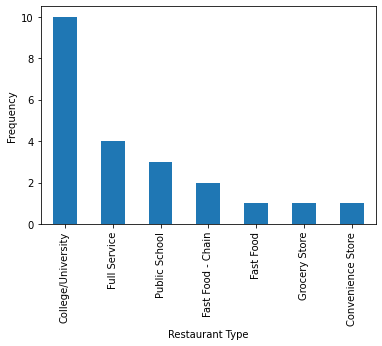

In [18]:
#Bar graph of college park compliant restaurant types
compliant_cp["category"].value_counts().plot(kind="bar")
plt.xlabel("Restaurant Type")
plt.ylabel("Frequency")

In [19]:
comp_outstanding = foodinsp_df.loc[foodinsp_df['inspection_results']=='Compliance Schedule - Outstanding']
comp_sched_completed = foodinsp_df.loc[foodinsp_df['inspection_results']=='Compliance Schedule - Completed']
comp_outstanding_cp = comp_outstanding[comp_outstanding['city']=='COLLEGE PARK']
comp_sched_completed_cp = comp_sched_completed[comp_sched_completed['city']=='COLLEGE PARK']

In [20]:
all_comps_var = [compliant_cp, comp_outstanding_cp, comp_sched_completed_cp]

all_comps_dfs = pd.concat(all_comps_var)

In [21]:
all_comps_dfs

,establishment_id,name,category,inspection_date,inspection_results,city,state,zip,address_line_1,address_line_2,...,no_bare_hand_contact,adequate_hand_washing,rodent_and_insects,food_contact_surfaces_and,inspection_type,owner,type,:@computed_region_87xh_ddyp,geocoded_column_1.type,geocoded_column_1.coordinates
109,329,CHIPOTLE MEXICAN GRILL 1786,Fast Food - Chain,2020-03-16T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,10250 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,MONTGOMERY F MORAN,Food Establishments,15305,Point,"[-76.924414, 39.022738]"
232,8480,UMCP - HIBACHI SAN 66,College/University,2019-10-17T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,3841 CAMPUS DR,0117,...,In Compliance,In Compliance,In Compliance,In Compliance,N/A,ANDREW CHERNG,Food Establishments,15306,Point,"[-76.948226, 38.984828]"
247,1612,UMCP - TACO BELL ENGINEERING,College/University,2019-10-22T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,3841 CAMPUS DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,Joseph Mullineaux,Food Establishments,15306,Point,"[-76.948226, 38.984828]"
256,2347,UMCP - E & M SUBWAY 1738,College/University,2019-10-22T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,3841 CAMPUS DR,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,JOSEPH MULLINEAUX,Food Establishments,15306,Point,"[-76.948226, 38.984828]"
269,1496,TACO BELL 28976,Fast Food,2020-01-06T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,8428 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,JAMES BODENSTEDT,Food Establishments,15305,Point,"[-76.932392, 38.994329]"
305,8480,UMCP - HIBACHI SAN 66,College/University,2019-04-19T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20742,3841 CAMPUS DR,0117,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,ANDREW CHERNG,Food Establishments,15306,Point,"[-76.948226, 38.984828]"
385,1362,SHOPPERS FOOD 52050 (2366),Grocery Store,2020-01-09T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,4720 CHERRY HILL RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,JILL SUTTON,Food Establishments,15305,Point,"[-76.929323, 39.01532]"
579,13334,THE HOTEL @ UMCP - LOBBY BAR,Full Service,2018-12-19T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,SUSAN HILLMAN,Food Establishments,15306,Point,"[-76.936569, 38.986309]"
609,13337,THE HOTEL @ UMCP - CONCIERGE LOUNGE,Full Service,2018-05-22T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Monitoring,SUSAN HILLMAN,Food Establishments,15306,Point,"[-76.936569, 38.986309]"
610,13385,THE HOTEL @ UMCP - SUNDRY CONVENIENCE,Convenience Store,2018-05-22T00:00:00.000,Compliant - No Health Risk,COLLEGE PARK,MD,20740,7777 BALTIMORE AVE,------,...,In Compliance,In Compliance,In Compliance,In Compliance,Comprehensive,SUSAN HILLMAN,Food Establishments,15306,Point,"[-76.936569, 38.986309]"


In [22]:
all_comps_dfs["inspection_results"].value_counts()


Compliant - No Health Risk           22
Compliance Schedule - Outstanding    12
Compliance Schedule - Completed       7
Name: inspection_results, dtype: int64

Text(0, 0.5, 'Frequency')

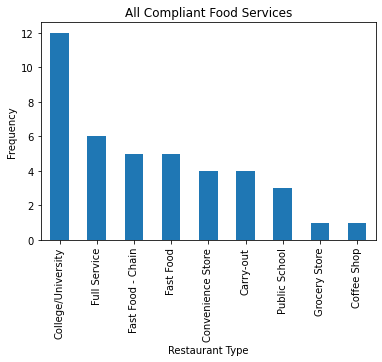

In [24]:
all_comps_dfs["category"].value_counts().plot(kind="bar")
plt.title("All Compliant Food Services")
plt.xlabel("Restaurant Type")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

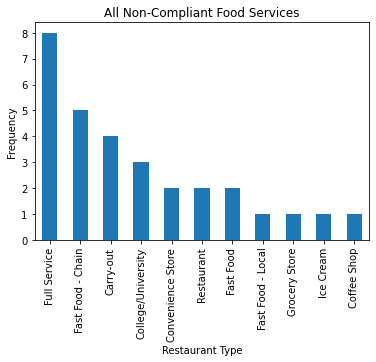

In [26]:
all_non_comp_df["category"].value_counts().plot(kind="bar")
plt.title("All Non-Compliant Food Services")
plt.xlabel("Restaurant Type")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

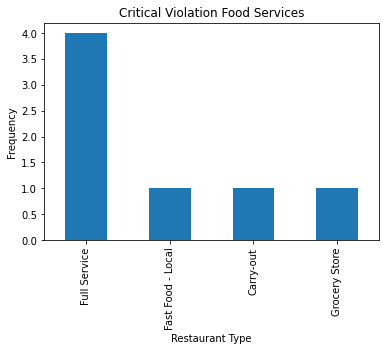

In [25]:
#bar graph of critical violations in category column
critical_viol_cp["category"].value_counts().plot(kind="bar")
plt.title("Critical Violation Food Services")
plt.xlabel("Restaurant Type")
plt.ylabel("Frequency")